In [6]:
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "Adobe Gothic Std"

In [3]:
def get_meridios_quality_history_csv(provider, csv):
    df = pd.read_csv(csv, 
                     usecols=["lastupdate", "metricname", "ptsseen_avg"], 
                     parse_dates=["lastupdate"])
    df['Provider'] = provider.replace("_", " ")
    # Normalize last update to just a date (not specific run time)
    df['lastupdate'] = df['lastupdate'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day))
    return df

def basic_trendline(dataframe, chart, column, metrictitle, threshold):
    dataframe[column].plot(ax=chart, legend=False)
    chart.set(title=metrictitle, ylim=(0,100), xlabel="")
    chart.axhline(y=threshold, color='#6d904f', label='NCQA 90%ile', linestyle='--', linewidth=2, zorder=5)
    
    chart.xaxis.set_major_formatter(plt.NullFormatter())
    
def create_individual_core_quality_graphs(individual):
    dfs = []
    dfs.append(get_meridios_quality_history_csv('FCN',"FCN.csv"))
    #dfs.append(get_meridios_quality_history_csv(clinic, ('./clinic/' + clinic + '.csv')))
    dfs.append(get_meridios_quality_history_csv(individual, ('./provider/' + individual + '.csv')))   
    big_frame = pd.concat(dfs, ignore_index=True)
    big_frame = big_frame.pivot_table(index='lastupdate', columns=['metricname','Provider'], values="ptsseen_avg")
    
    # Summary Graph
    fig, ax = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9,9))
    fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
    fig.suptitle(individual.replace("_", " ") + ": Core Quality Measures", fontsize=24)
    
    basic_trendline(big_frame, ax[0][0], "PAP", "Pap", 85)
    basic_trendline(big_frame, ax[0][1], "MAMMO", "Mammogram", 78)
    basic_trendline(big_frame, ax[0][2], "COLORECTAL", "Colorectal", 76)
    
    basic_trendline(big_frame, ax[1][0], "DM-EYE", "Retinopathy (DM)", 76)
    basic_trendline(big_frame, ax[1][1], "DM-FOOT", "Neuropathy (DM)", 77)
    basic_trendline(big_frame, ax[1][2], "DM-KIDNEY", "Nephropathy (DM)", 80)

    basic_trendline(big_frame, ax[2][0], "TDAP", "Tdap", 80)
    basic_trendline(big_frame, ax[2][1], "DM-PPSV", "Pneumovax (DM)", 80)
    fig.delaxes(ax[2][2])
    
    # Colors '008fd5' blue, 'fc4f30' red, 'e5ae38' yellowish, '6d904f' green, '8b8b8b' gray, '810f7c' purple]
    # Manually assign colors (ax order set programmatically already)
    if (individual > "FCN"):
        for ax in fig.axes:
            ax.get_lines()[0].set_color("#008fd5")
            ax.get_lines()[1].set_color("#810f7c")
    else:
        for ax in fig.axes:
            ax.get_lines()[0].set_color("#810f7c")
            ax.get_lines()[1].set_color("#008fd5")
    
    plt.figtext(0.70,0.37,'1/1 through 10/31/2017',fontsize=14,ha='left')
    plt.figtext(0.70,0.34,'FCN',fontsize=14,ha='left',color="#008fd5")
    plt.figtext(0.70,0.31,individual.replace("_", " "),fontsize=14,ha='left',color="#810f7c")
    plt.figtext(0.70,0.28,'Target',fontsize=14,ha='left',color="#6d904f")
    plt.savefig("./output/" + individual + ".png")
    
def create_clinic_core_quality_graphs(clinic):
    dfs = []
    dfs.append(get_meridios_quality_history_csv('FCN',"FCN.csv"))
    dfs.append(get_meridios_quality_history_csv(clinic, ('./clinic/' + clinic + '.csv')))
    #dfs.append(get_meridios_quality_history_csv(individual, ('./provider/' + individual + '.csv')))   
    big_frame = pd.concat(dfs, ignore_index=True)
    big_frame = big_frame.pivot_table(index='lastupdate', 
                                      columns=['metricname','Provider'], 
                                      values="ptsseen_avg")
    
    # Summary Graph
    fig, ax = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9,9))
    fig.suptitle(clinic.replace('_'," ") + ": Core Quality Measures", fontsize=24)
    
    basic_trendline(big_frame, ax[0][0], "PAP", "Pap", 85)
    basic_trendline(big_frame, ax[0][1], "MAMMO", "Mammogram", 78)
    basic_trendline(big_frame, ax[0][2], "COLORECTAL", "Colorectal", 76)
    
    basic_trendline(big_frame, ax[1][0], "DM-EYE", "Retinopathy (DM)", 76)
    basic_trendline(big_frame, ax[1][1], "DM-FOOT", "Neuropathy (DM)", 77)
    basic_trendline(big_frame, ax[1][2], "DM-KIDNEY", "Nephropathy (DM)", 80)

    basic_trendline(big_frame, ax[2][0], "TDAP", "Tdap", 80)
    basic_trendline(big_frame, ax[2][1], "DM-PPSV", "Pneumovax (DM)", 80)
    ax[2][1].legend(loc="lower right", bbox_to_anchor=(2.2,0.2))
    ax[2][2].axis('off')
    plt.figtext(0.93,0.37,'2017 Q1 through Q3',fontsize=14,ha='right')
    plt.savefig("./output/" + clinic + ".png")

In [7]:
currentdata = pd.read_csv('./current/12.4.2017 ProviderGroupQualityReports.csv', usecols=['NAME', 'Metricname', 'SeenAvg'])

# Add Clinic Column with lookup
providerclinic = pd.read_csv('./current/provider-clinic.csv', index_col='NAME')
currentdata['Clinic']=currentdata.NAME.map(providerclinic.CLINIC)
providergender = pd.read_csv('./current/provider-gender.csv', index_col='NAME')
currentdata['Provider-gender']=currentdata.NAME.map(providergender.GENDER)

# Remove Clinic Data from Dataframe
#currentdata.NAME.unique()
individuals = currentdata.loc[~currentdata['NAME'].isin(['Bellingham Bay Medical Center',
                                                         'Birch Bay Family Medicine',
                                                         'Everson Family Medicine',
                                                         'Family Health Associates',
                                                         'Ferndale Family Medical Center',
                                                         'Island Family Physicians',
                                                         'Lynden Family Medicine', 
                                                         'North Cascade Family Physicians',
                                                         'North Sound Family Medicine', 
                                                         'Squalicum Family Medicine',
                                                         'Whatcom Family Medicine'])]

# CoreQuality is a subset of measures
#currentdata.Metricname.unique()
corequality = individuals.loc[individuals['Metricname'].isin(['Pap Smear Report',
                                                              'Colorectal Cancer Screening (Colonoscopy/Sigmoid/FIT test)',
                                                              'Mammogram Ages 52 -74',
                                                              'Eye exam',
                                                              'Foot Exam',
                                                              'Nephropathy Assessment',
                                                              'TD - Patients >18yrs with TD in last 10 years',
                                                              'Pneumovax - DM patients w/current pneumovax'])]
#corequality.Metricname.unique()
#Factorplot = sns.factorplot(x='SeenAvg', 
#                            y='Clinic', 
#                            data=corequality, 
#                            row='Metricname', 
#                            kind="strip", 
#                            orient='h')

mammo = corequality.loc[corequality['Metricname'] == 'Mammogram Ages 52 -74']

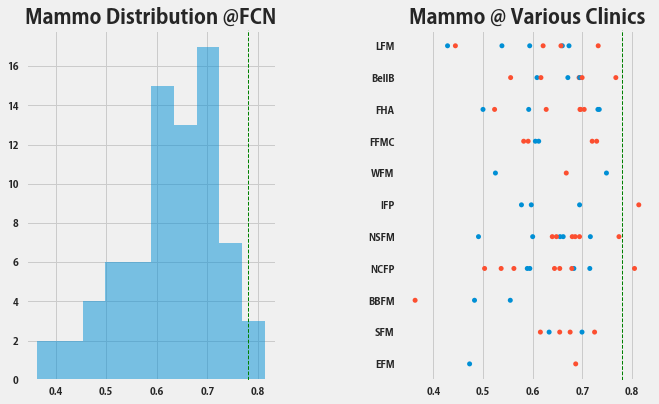

In [13]:
def create_mammo_graphs(mammo):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    fig.subplots_adjust(wspace = 0.5)
    
    sns.stripplot(x='SeenAvg',
                 y='Clinic',
                 data=mammo,
                 hue='Provider-gender',
                 ax=ax[1],)
    ax[1].axvline(x=0.78, color='g', label='NCQA 90%ile', linestyle='--', linewidth=1, zorder=5)
    ax[1].legend_.remove()
    ax[1].set(title="Mammo @ Various Clinics", xlabel="", ylabel='')

    pap.plot.hist(alpha=0.5, ax=ax[0], legend=False)
    ax[0].set(title="Mammo Distribution @FCN", xlabel="", ylabel='')
    ax[0].axvline(x=0.78, color='g', label='NCQA 90%ile', linestyle='--', linewidth=1, zorder=5)
    
create_mammo_graphs(mammo)                 


In [ ]:
def create_mammo_graphs(provider, pap):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
    fig.subplots_adjust(wspace = 0.5, vspace = 0.5)
    
    provider_data = get_meridios_quality_history_csv(provider, './clinic/' + provider + '.csv')
    provider_pivot = provider_data.pivot_table(index='lastupdate', columns=['metricname','Provider'], values="ptsseen_avg")

    provider_pivot["PAP"].plot(ax=ax[0], legend=False)
    ax[0].set(title=provider.replace("_", " ") + "'s Pap %", ylim=(0,100), xlabel="")
    ax[0].axhline(y=85, color='g', label='NCQA 90%ile', linestyle='--', linewidth=1, zorder=5)
    ax[0].xaxis.set_major_formatter(plt.NullFormatter())

    ax[0].annotate('Report redefined (twice)', xy=(0.78, 0.3),  xycoords='axes fraction',
            xytext=(0.78, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
    ax[0].annotate('', xy=(0.89, 0.3),  xycoords='axes fraction',
            xytext=(0.89, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

    sns.stripplot(x='SeenAvg',
                 y='Clinic',
                 data=pap,
                 hue='Provider-gender',
                 ax=ax[1],)
    ax[1].axvline(x=0.85, color='g', label='NCQA 90%ile', linestyle='--', linewidth=1, zorder=5)
    ax[1].legend_.remove()
    ax[1].set(title="Paps @ Various Clinics", xlabel="", ylabel='')

    pap.plot.hist(alpha=0.5, ax=ax[2], legend=False)
    ax[2].set(title="Distribtuion of Providers@FCN", xlabel="", ylabel='')
    ax[2].axvline(x=0.85, color='g', label='NCQA 90%ile', linestyle='--', linewidth=1, zorder=5)
    
    plt.savefig("./output-pap/" + provider + ".png")
                    
files = glob.glob('./clinic/*.csv')

for file in files:
    individual = file.replace('./clinic/',"")
    individual = individual[:-4] 
    create_pap_graphs(individual, pap)

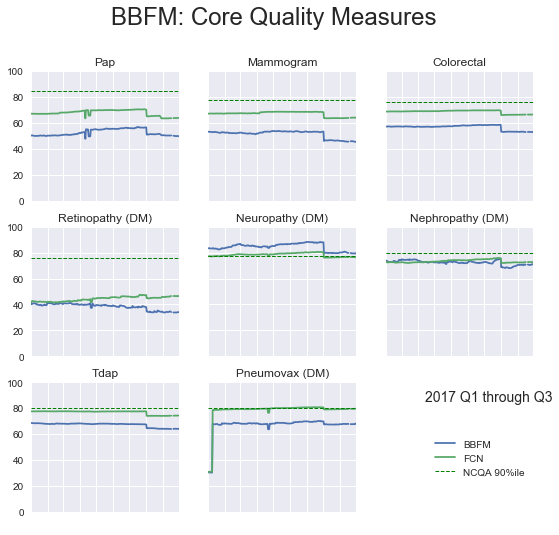

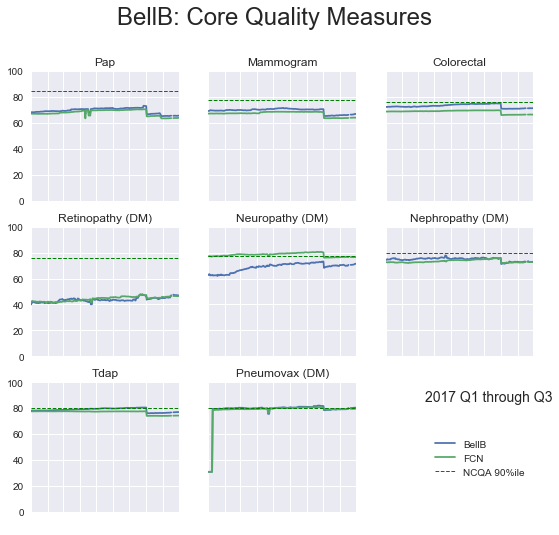

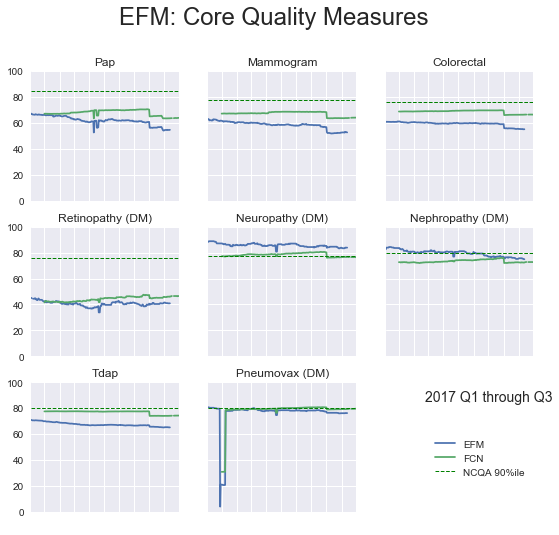

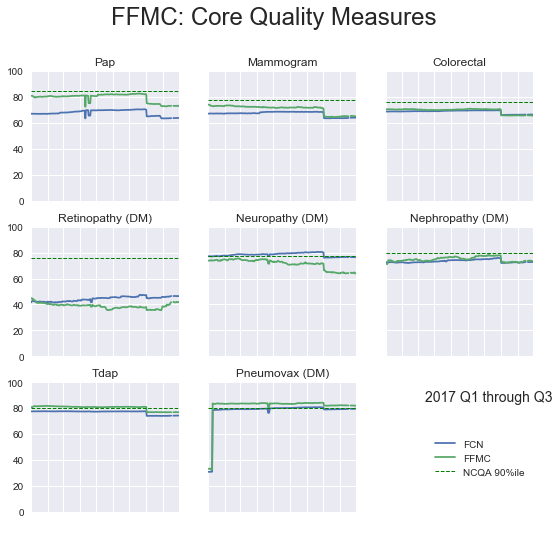

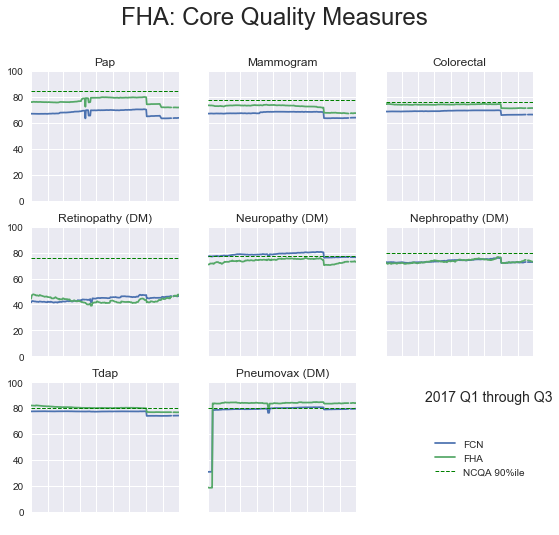

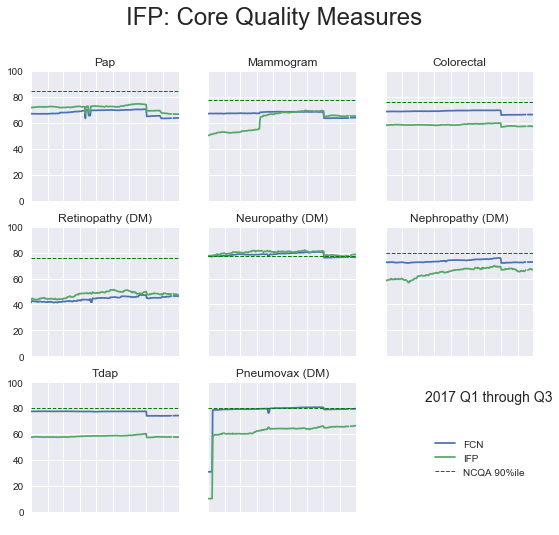

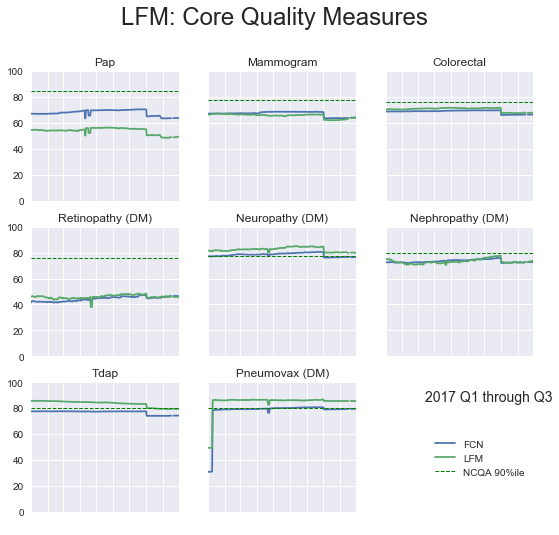

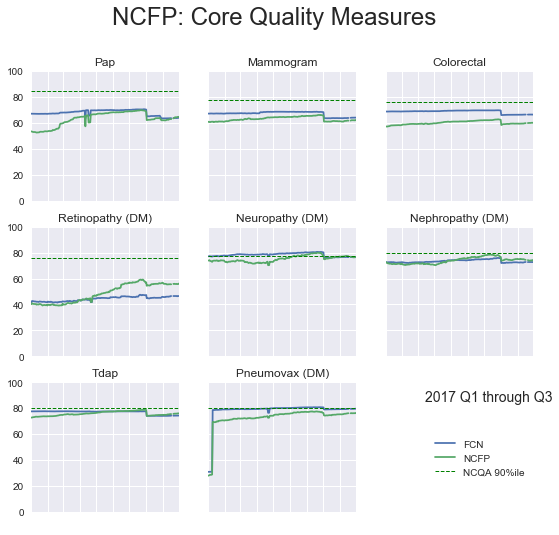

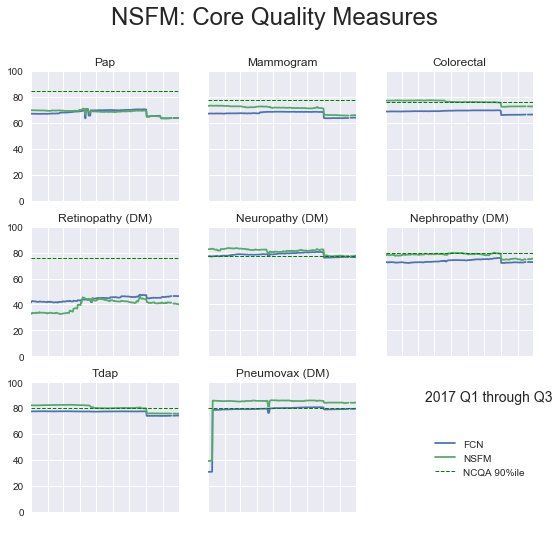

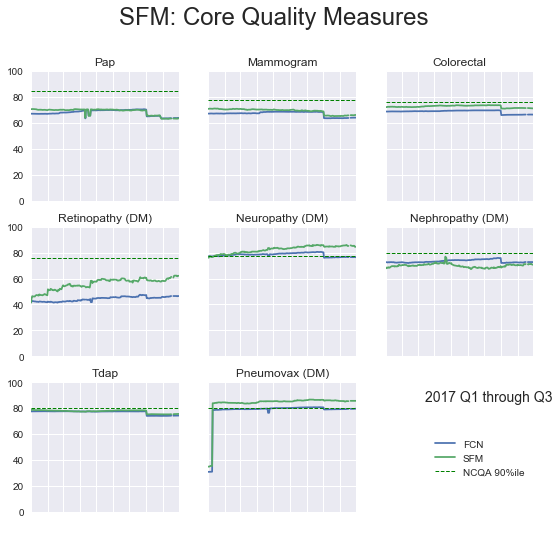

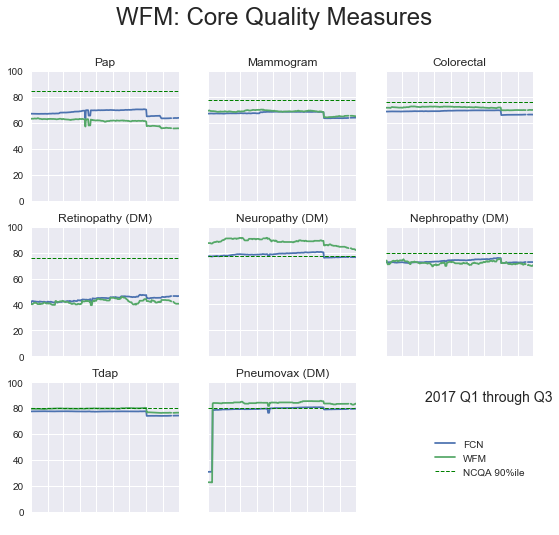

In [3]:
files = glob.glob('./clinic/*.csv')

for file in files:
    clinic = file.replace('./clinic/',"")
    clinic = clinic[:-4]
    create_clinic_core_quality_graphs(clinic)

In [8]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

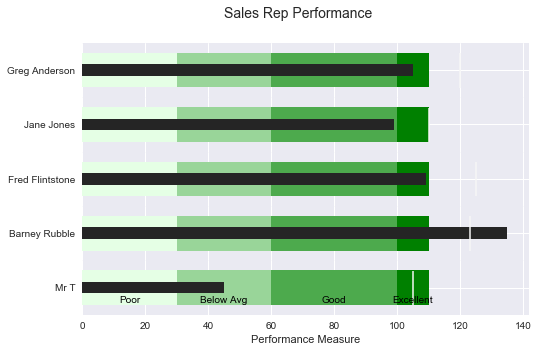

In [10]:
data_to_plot2 = [("Greg Anderson", 105, 120),
                 ("Jane Jones", 99, 110),
                 ("Fred Flintstone", 109, 125),
                 ("Barney Rubble", 135, 123),
                 ("Mr T", 45, 105)]

bulletgraph(data_to_plot2, limits=[30, 60, 100, 110],
            labels=["Poor", "Below Avg", "Good", "Excellent"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Sales Rep Performance")

In [41]:
files = glob.glob('./provider/*.csv')

dfs = []
for file in files:
    individual = file.replace('./provider/',"")
    individual = individual[:-4]
    #create_individual_core_quality_graphs(individual)
    dfs.append(get_meridios_quality_history_csv(individual, ('./provider/' + individual + '.csv')))  
 
big_frame = pd.concat(dfs, ignore_index=True)

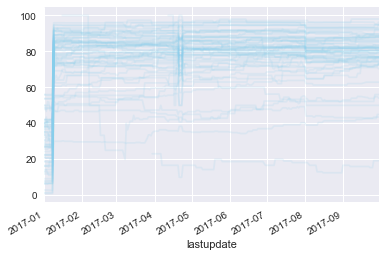

In [47]:
DM_PPSV = big_frame.loc[big_frame["metricname"] == 'DM-PPSV']
DM_PPSV= DM_PPSV.pivot_table(index='lastupdate', columns=['Provider'], values="ptsseen_avg")
DM_PPSV.plot(legend=False, color='skyblue', alpha=0.15,  figsize=(6,4))

/Users/jonathan/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


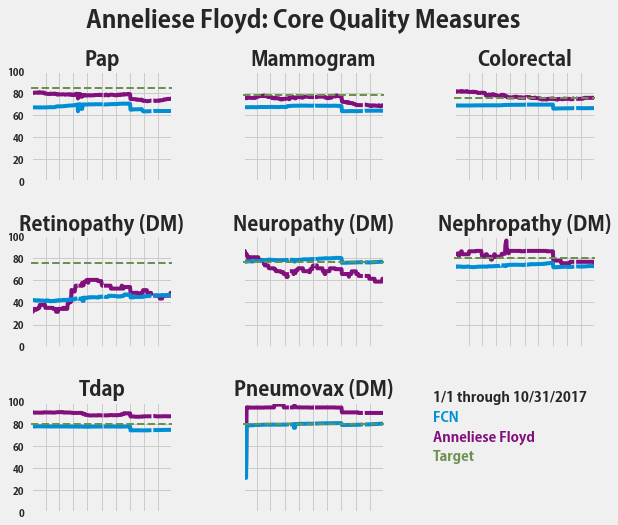

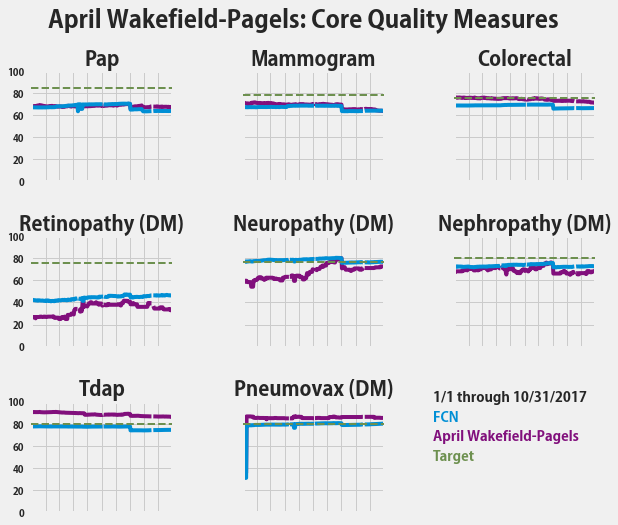

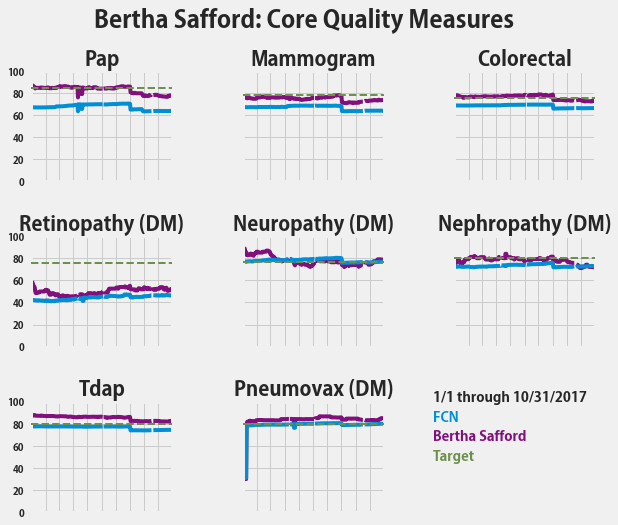

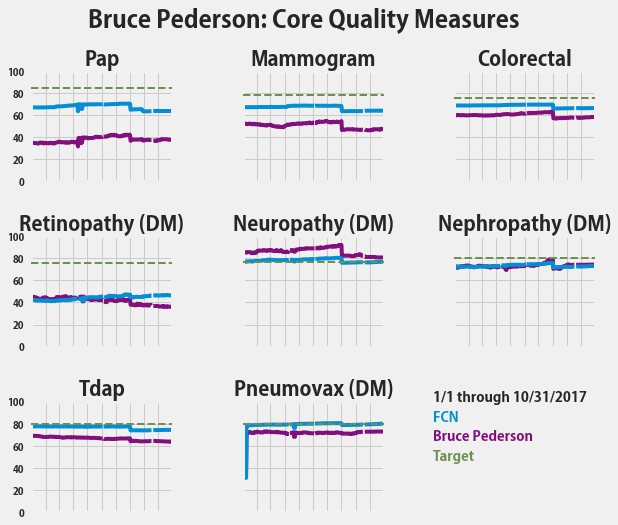

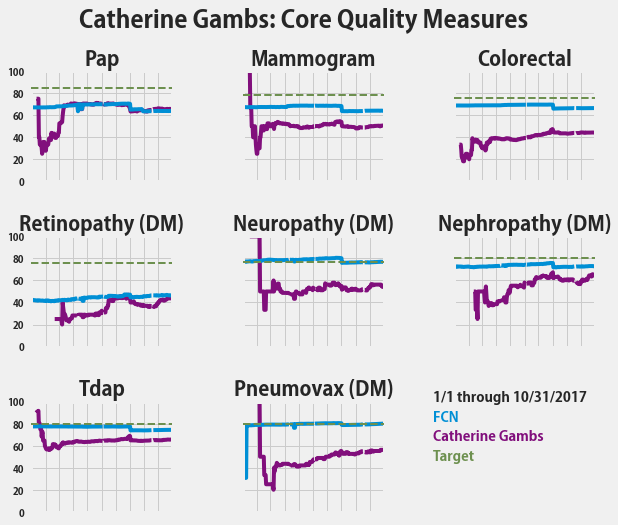

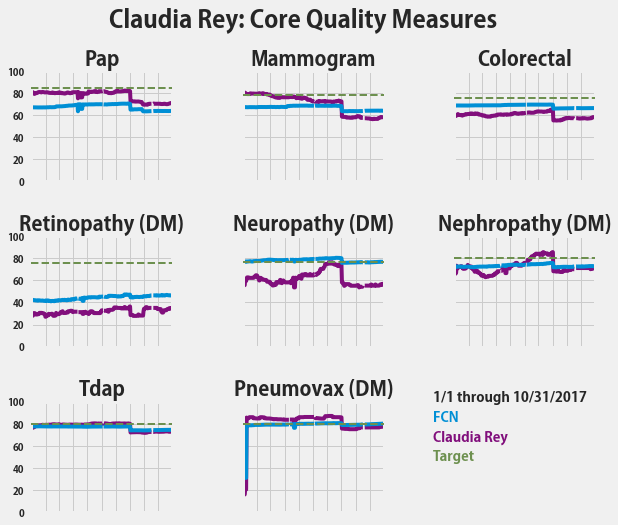

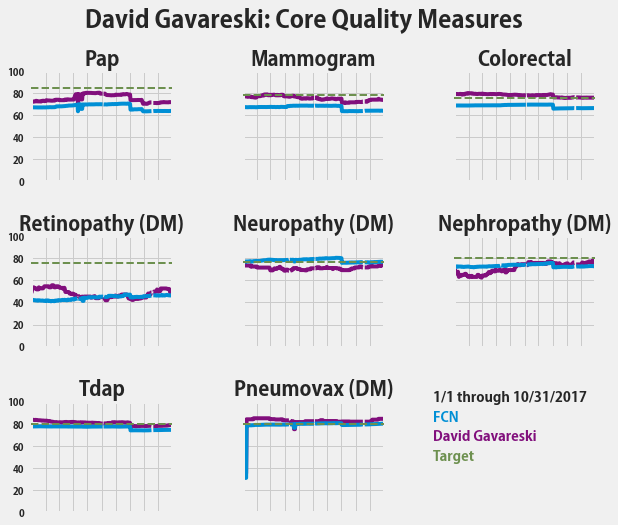

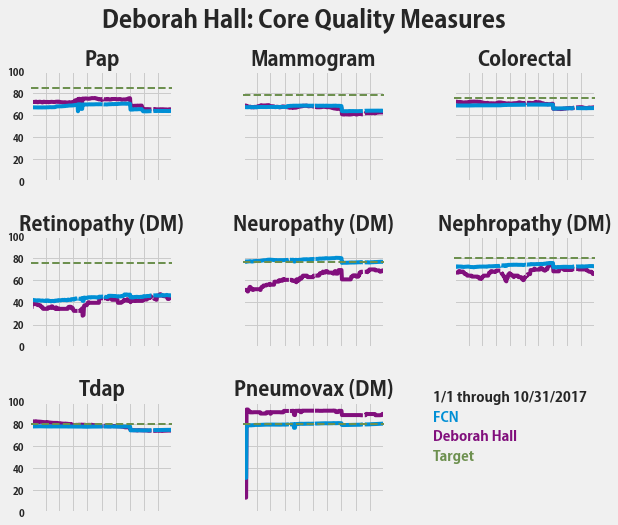

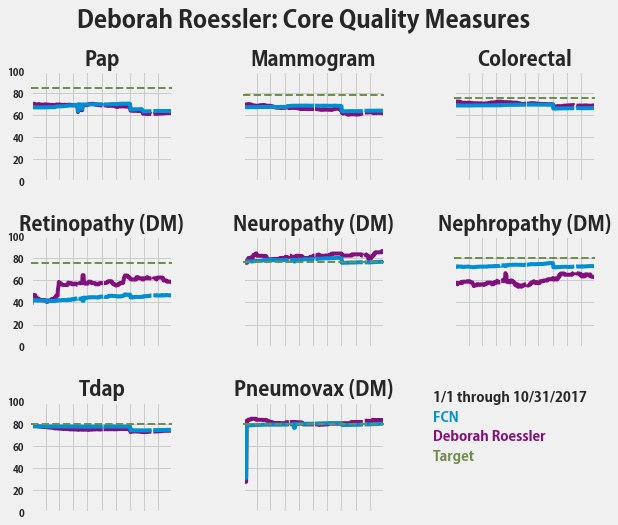

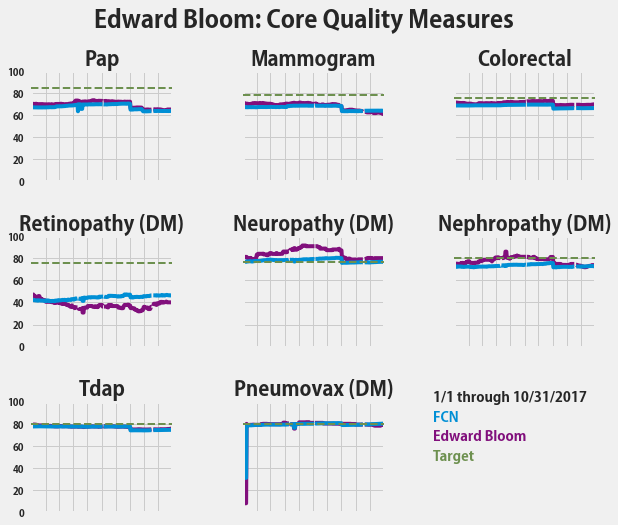

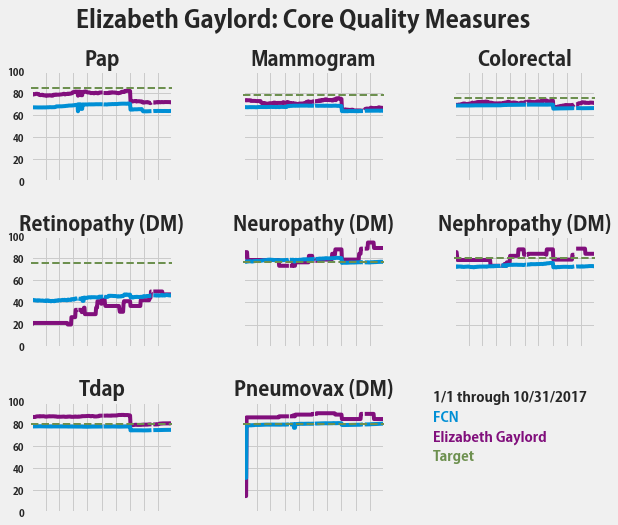

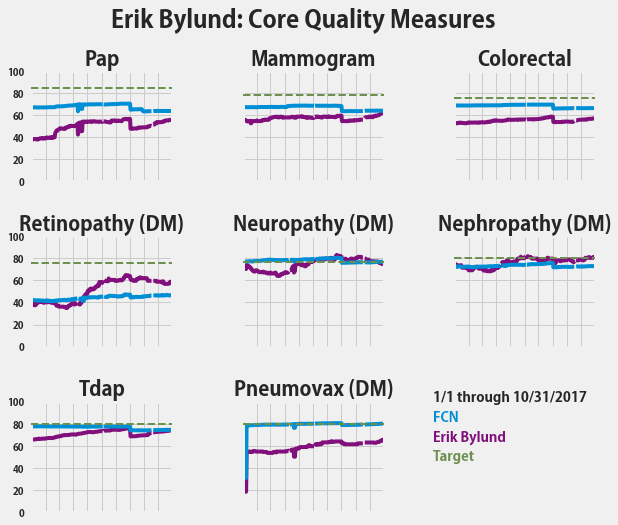

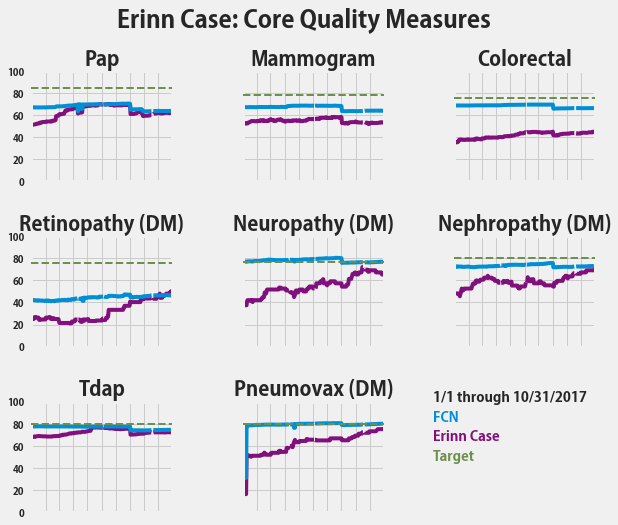

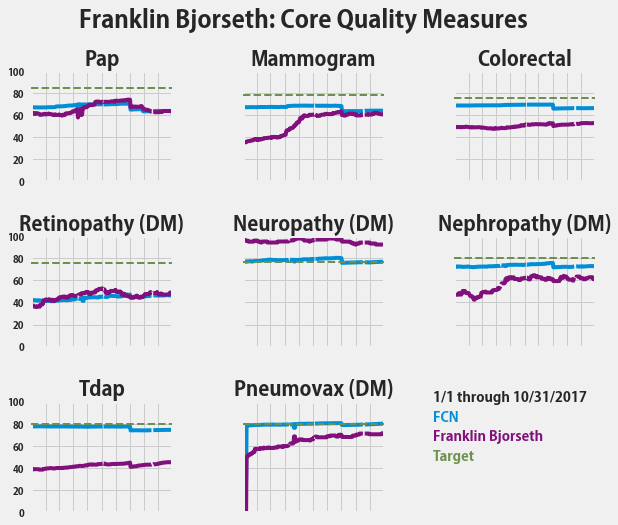

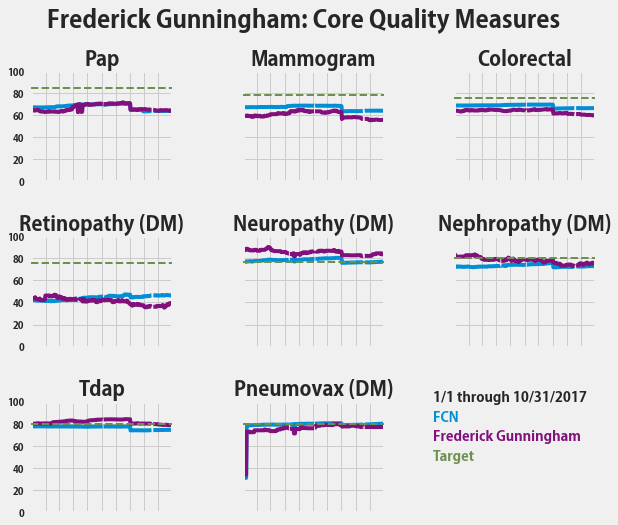

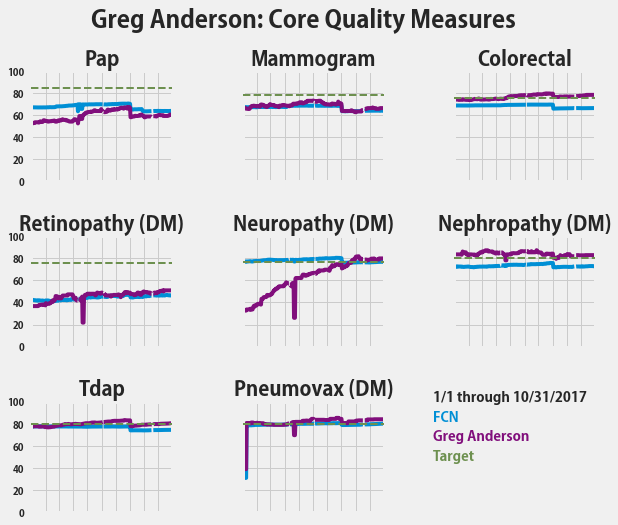

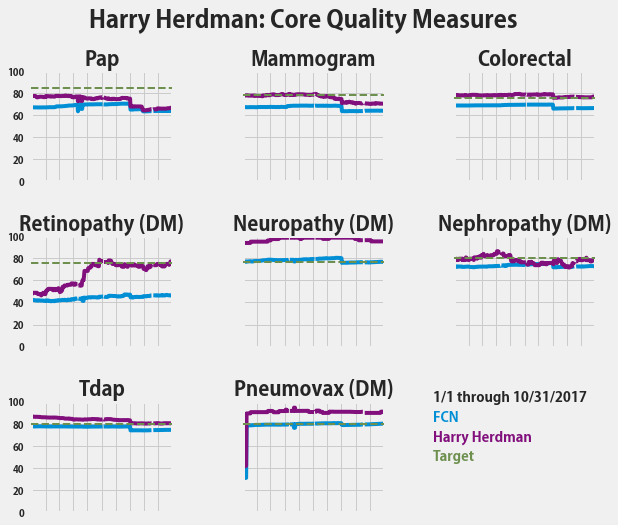

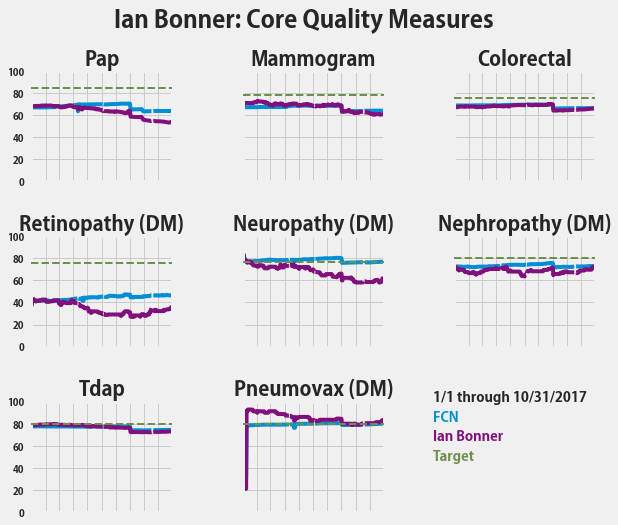

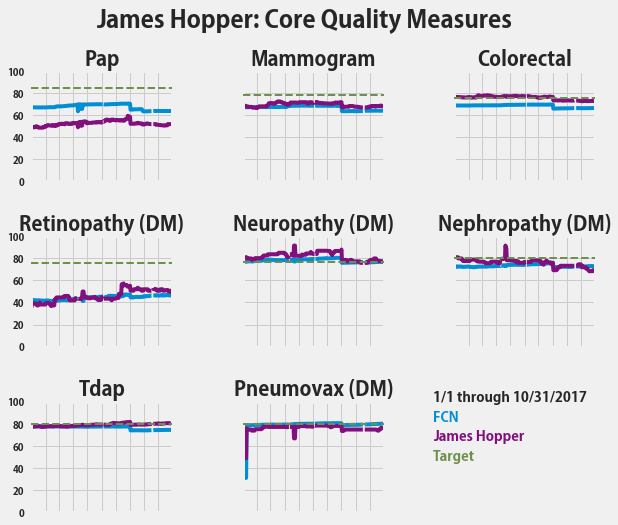

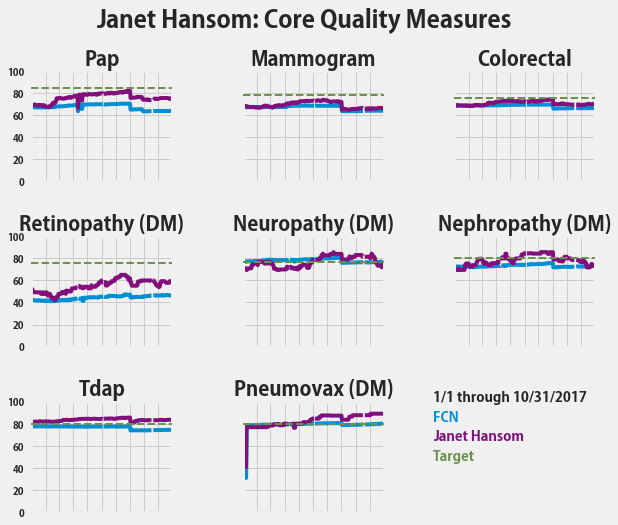

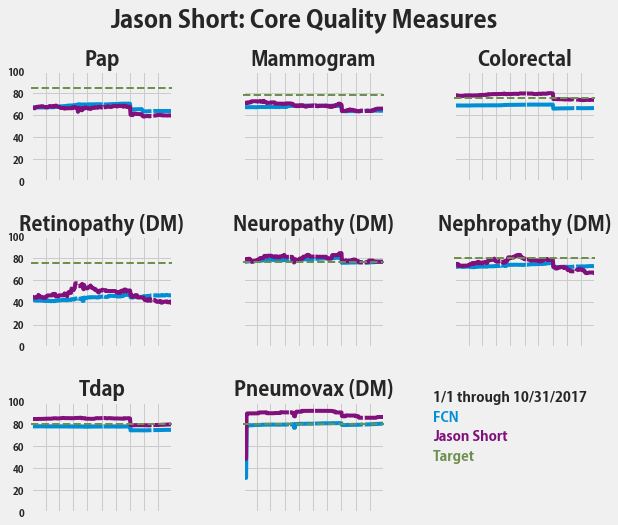

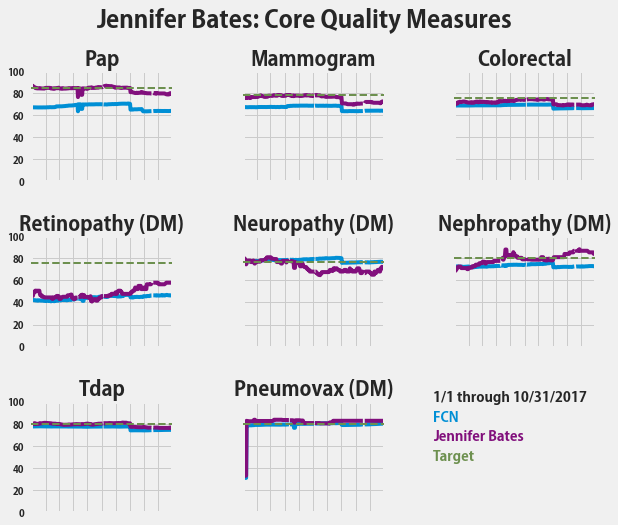

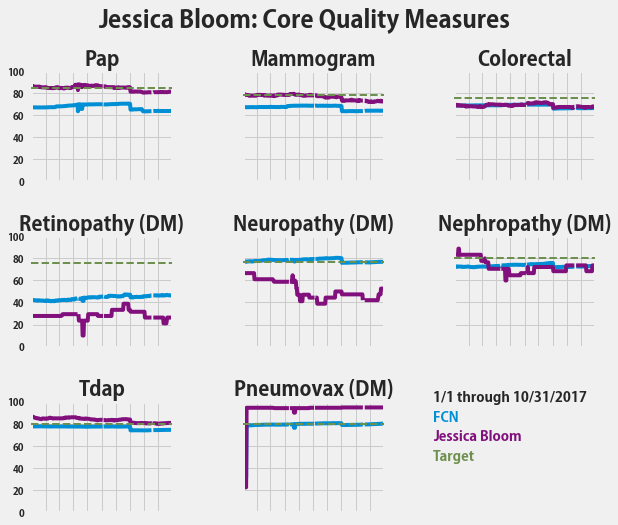

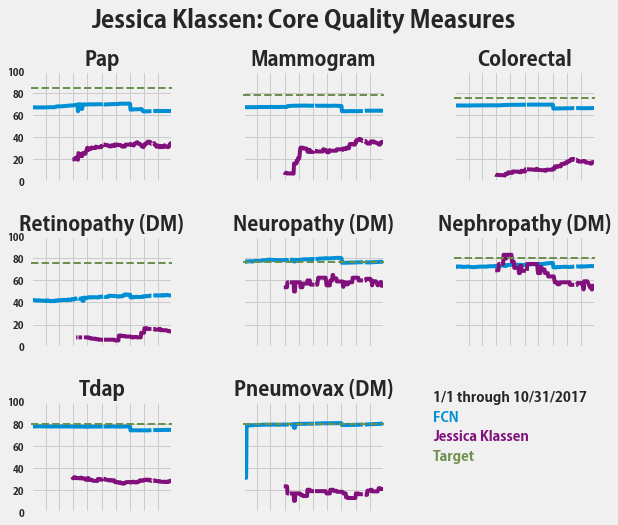

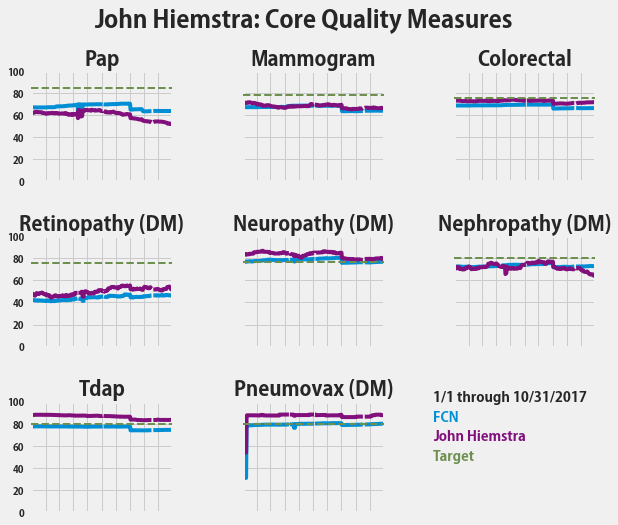

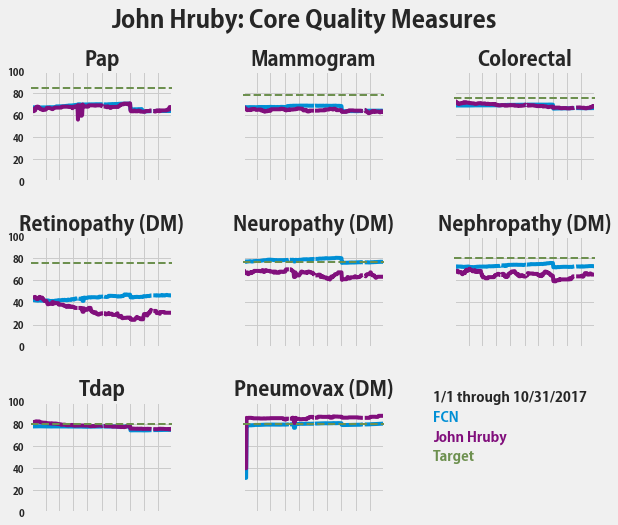

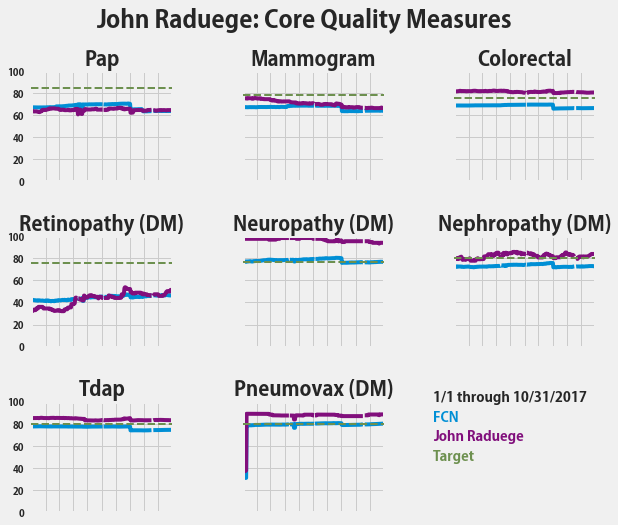

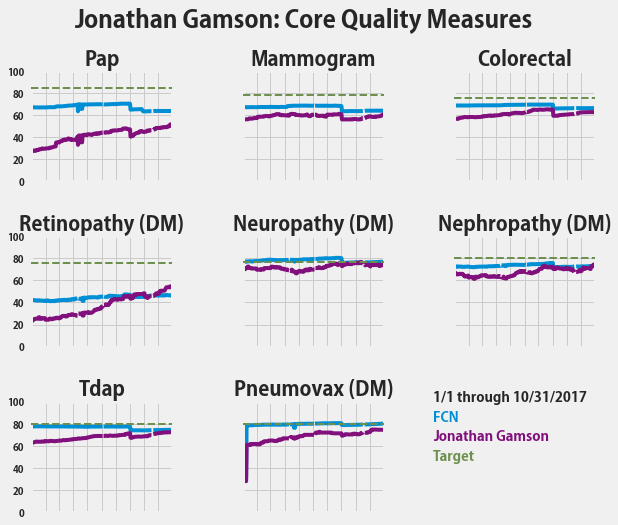

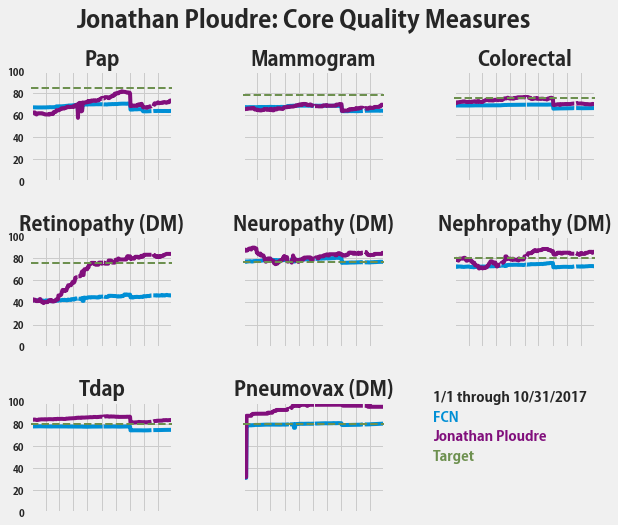

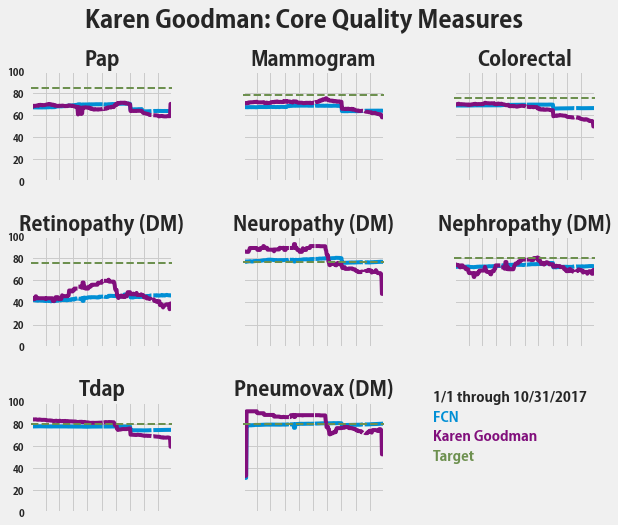

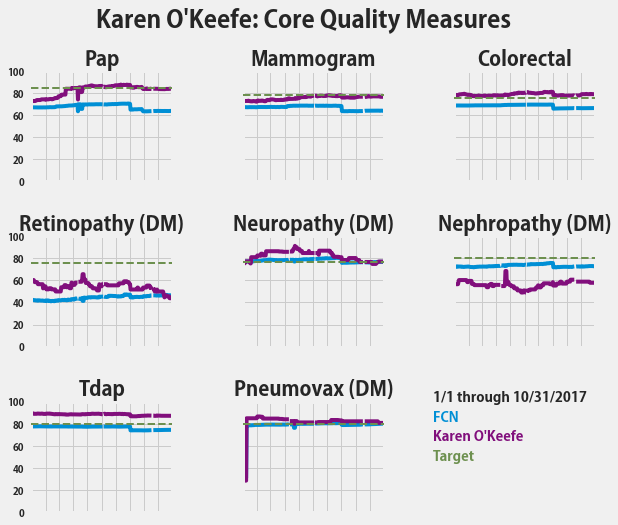

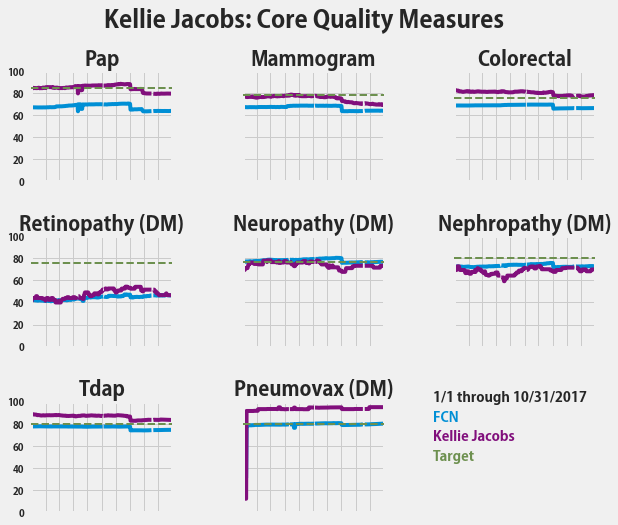

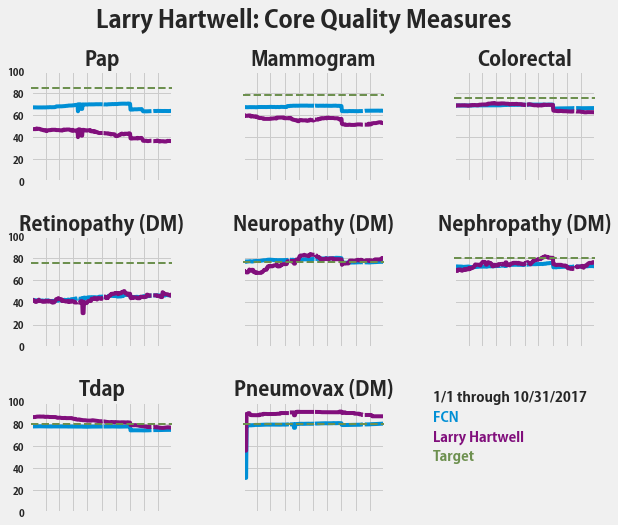

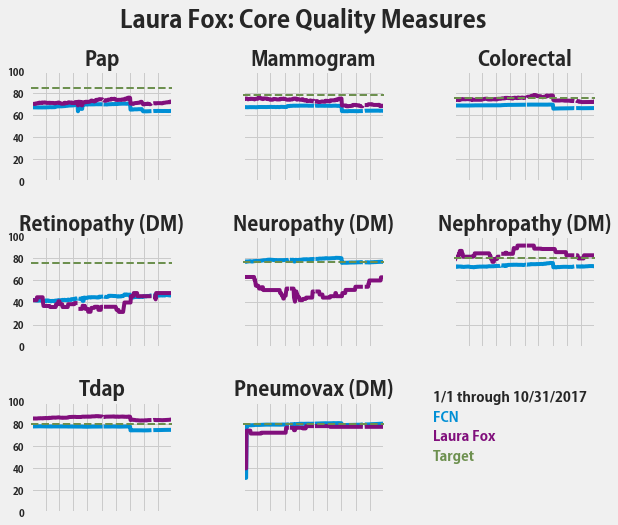

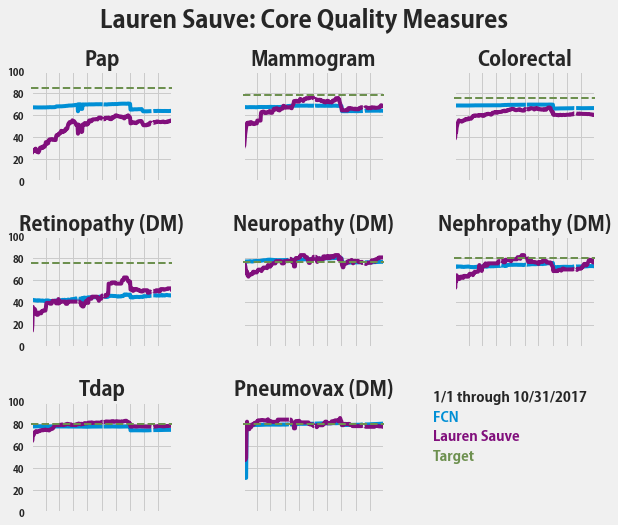

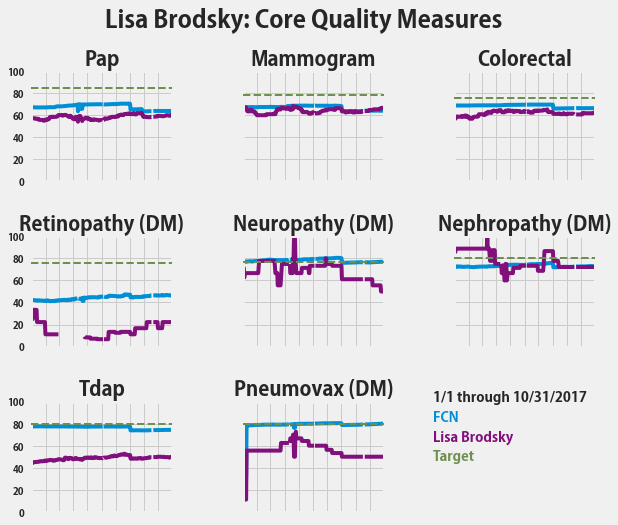

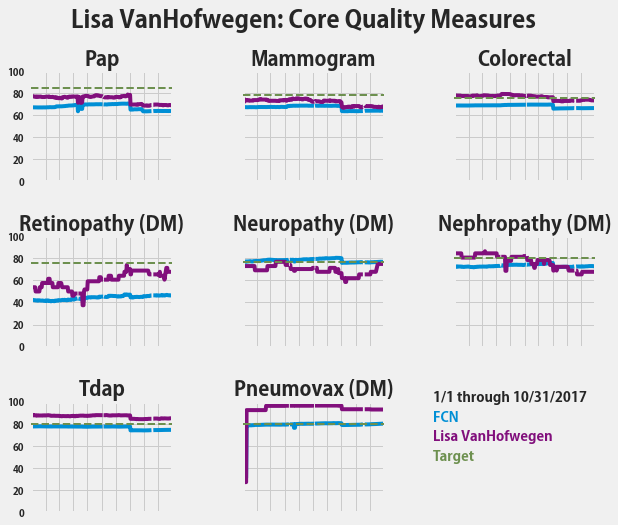

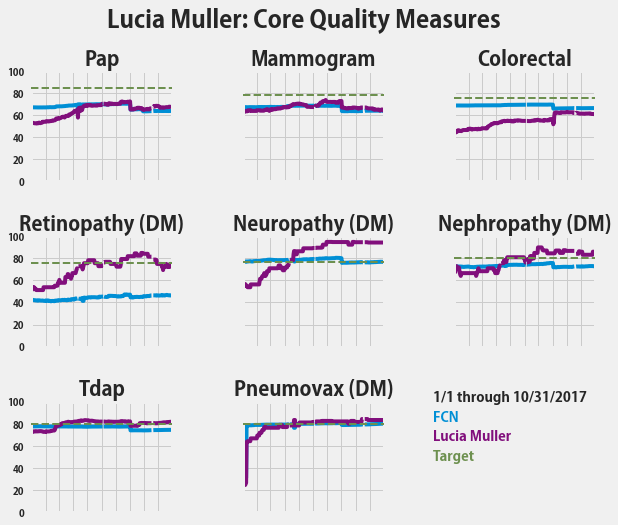

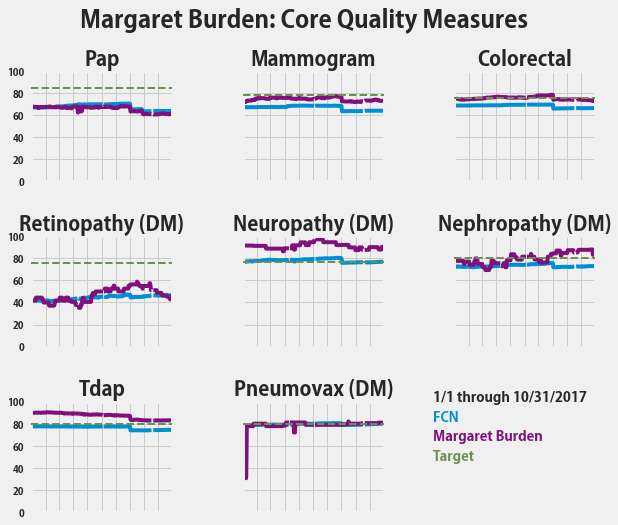

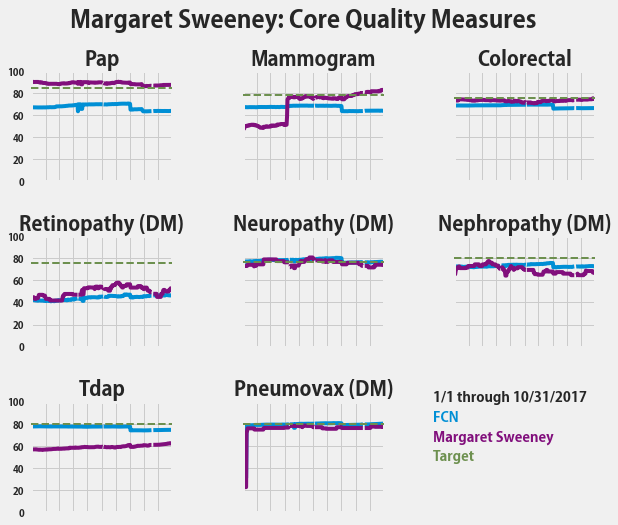

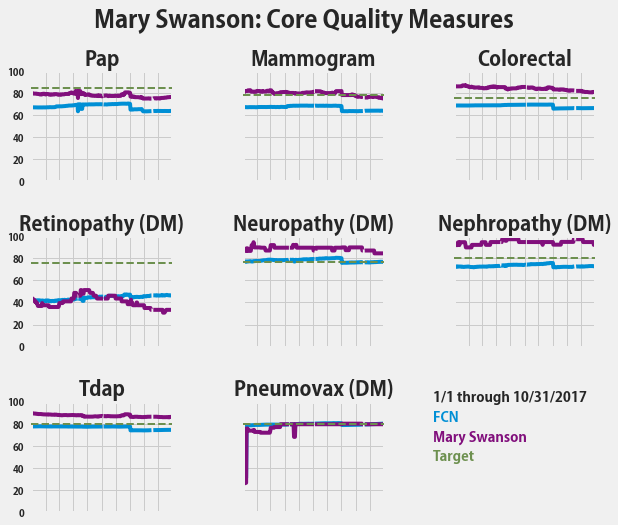

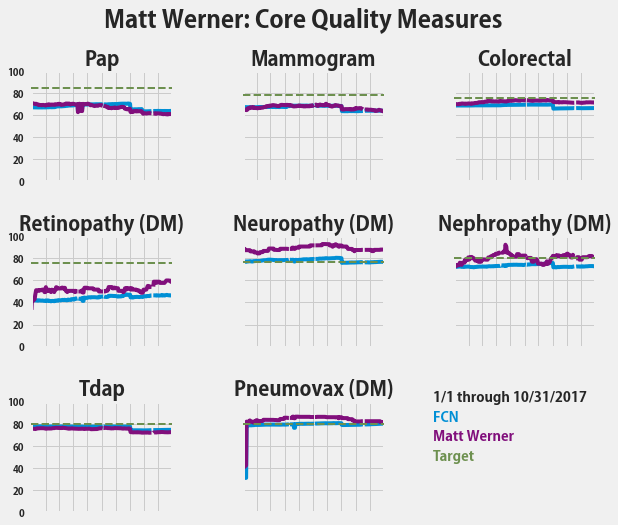

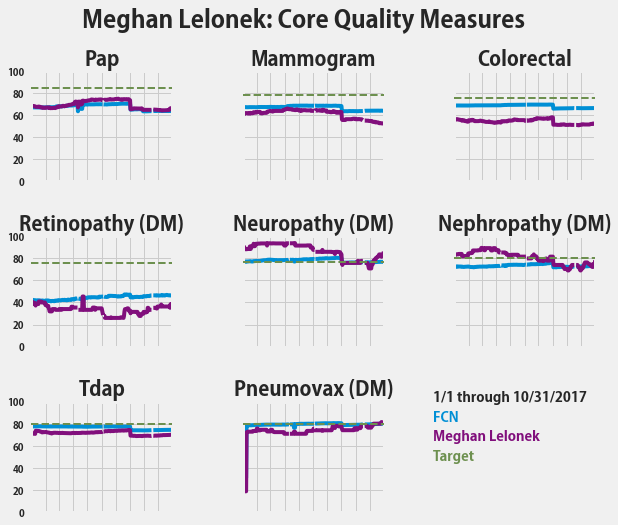

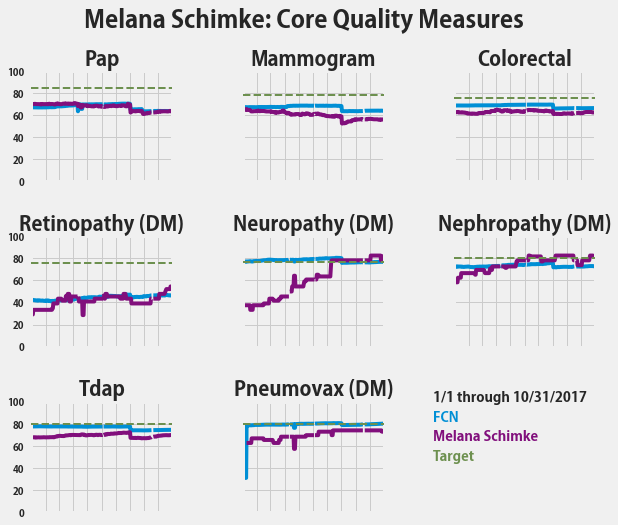

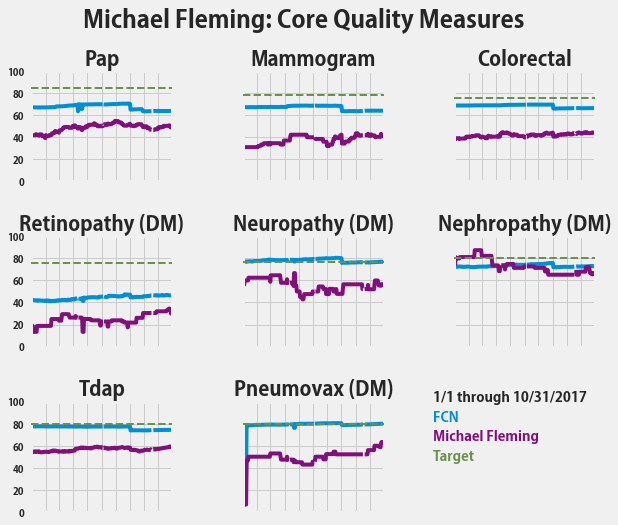

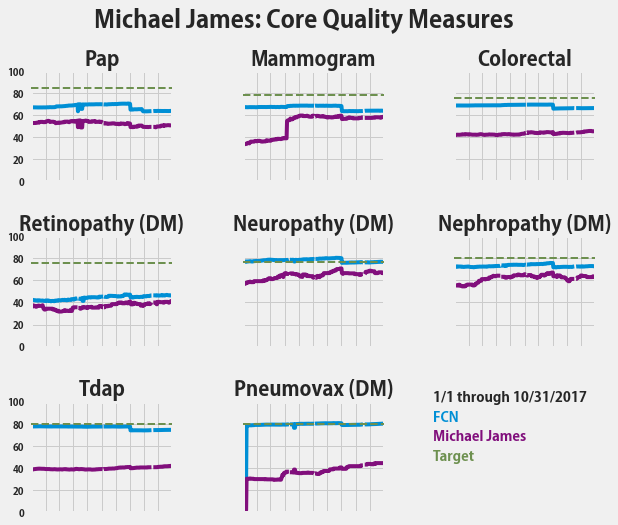

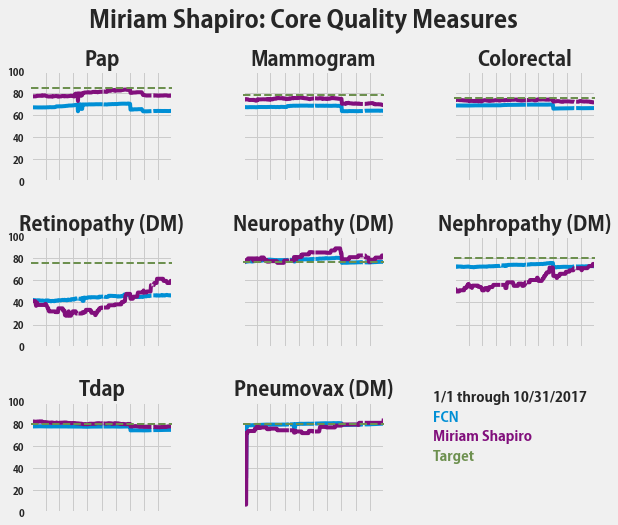

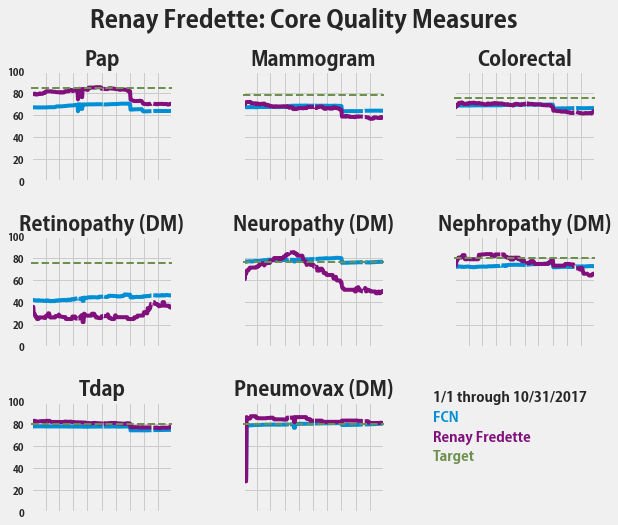

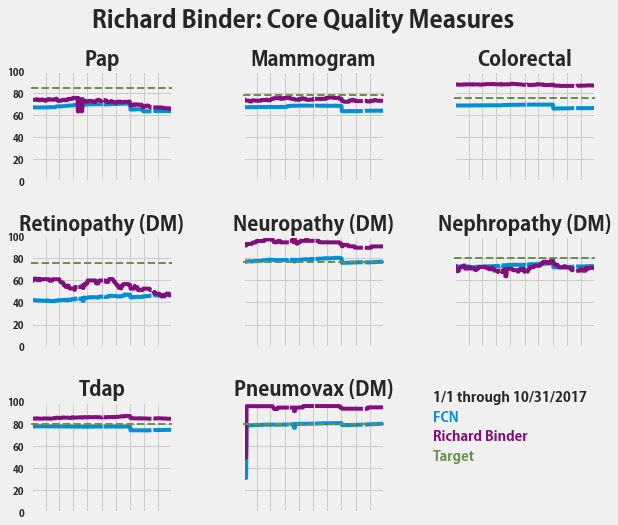

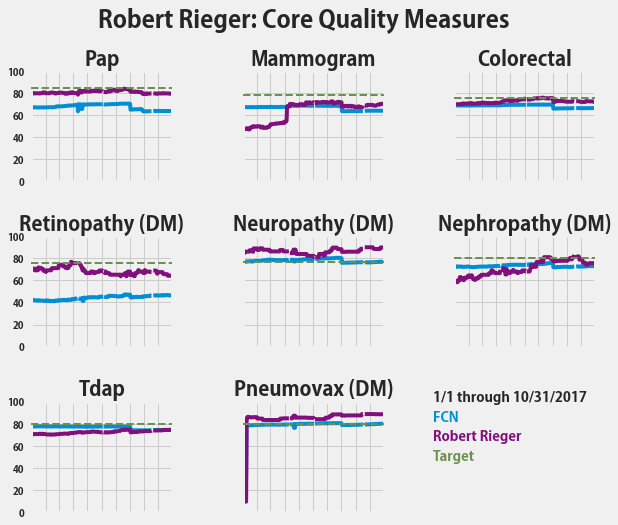

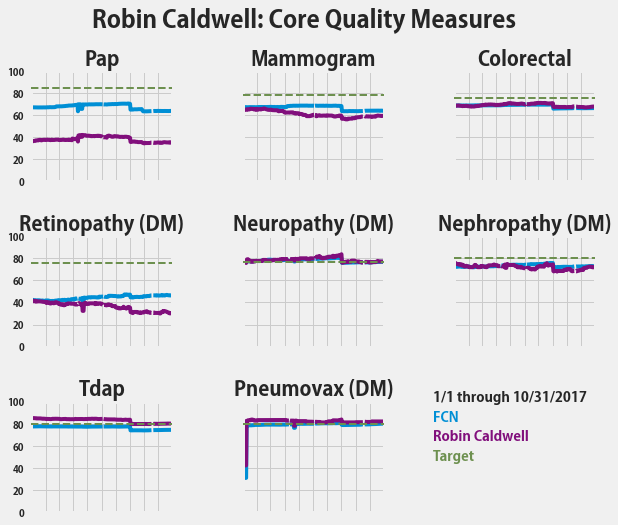

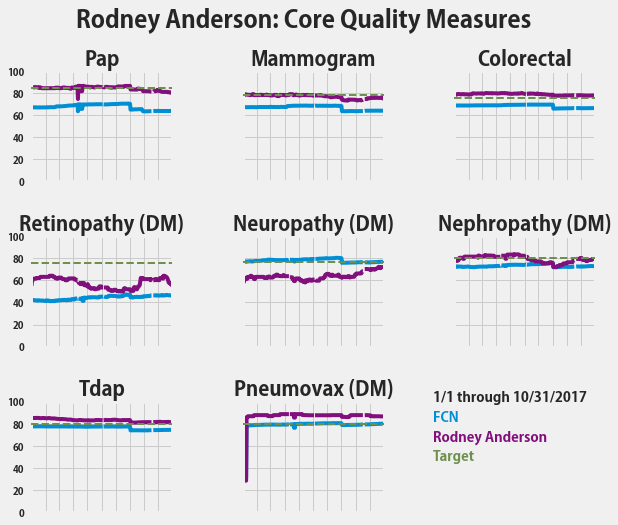

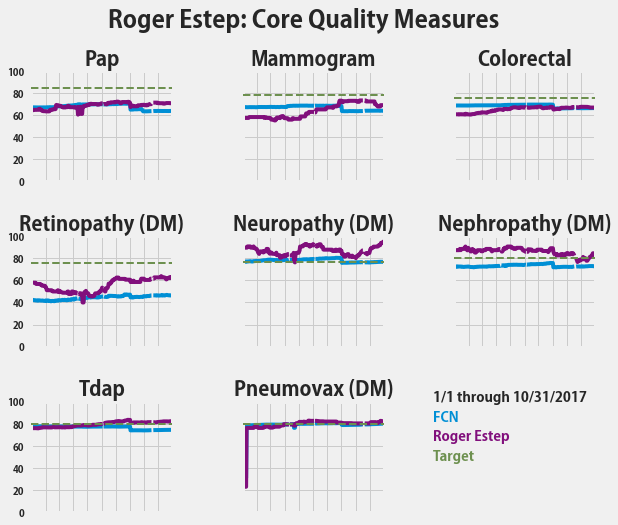

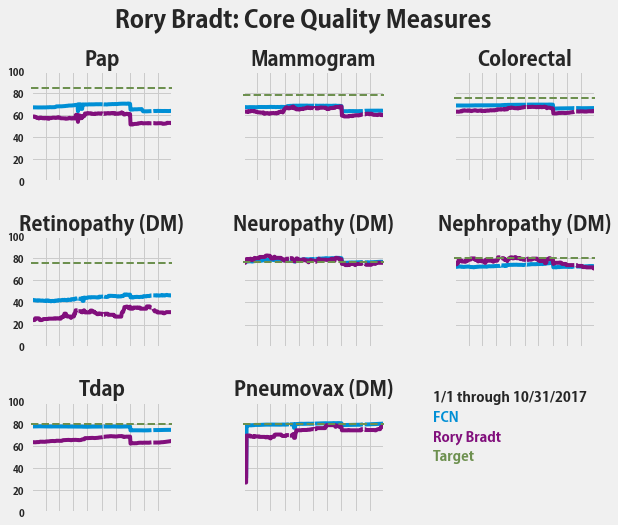

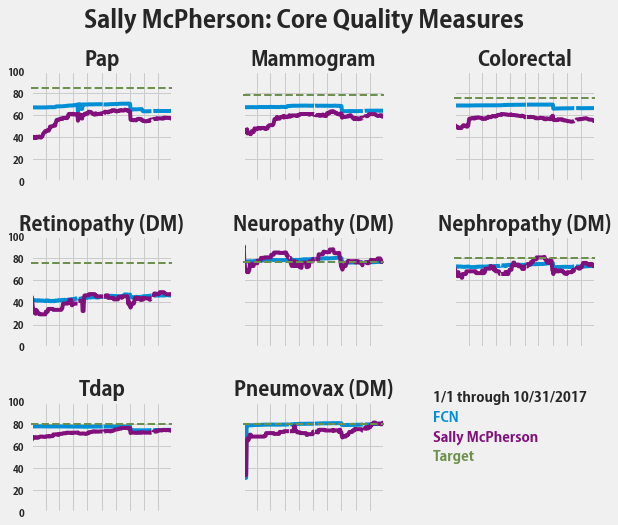

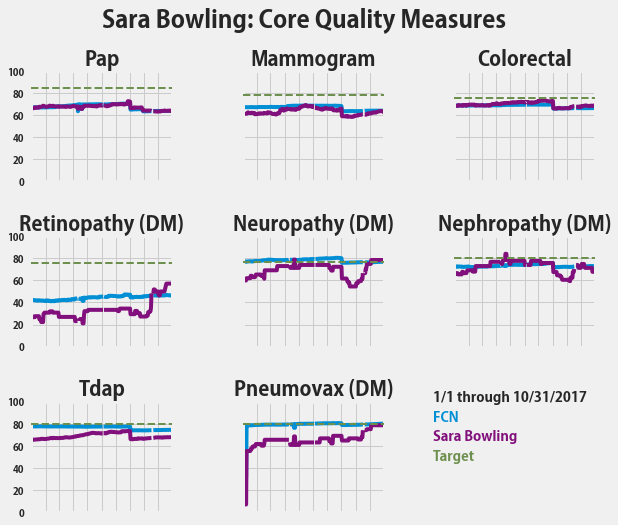

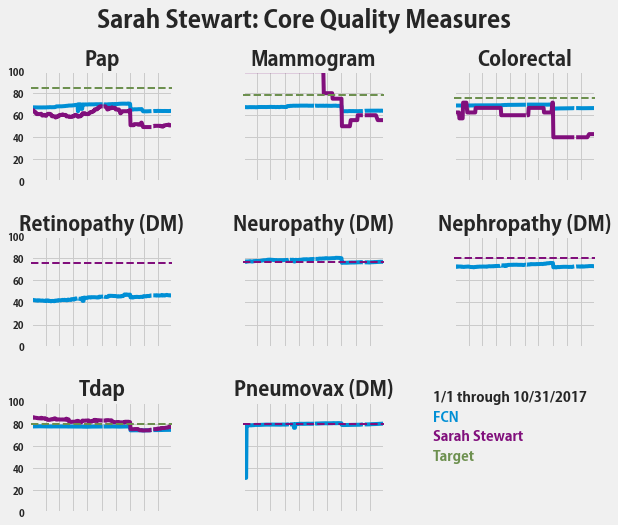

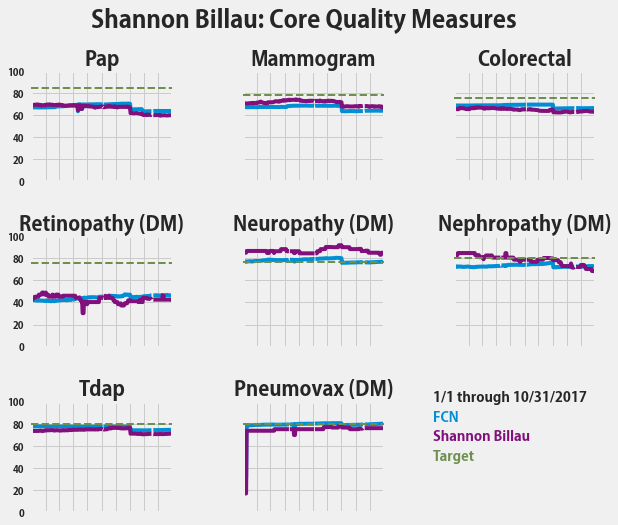

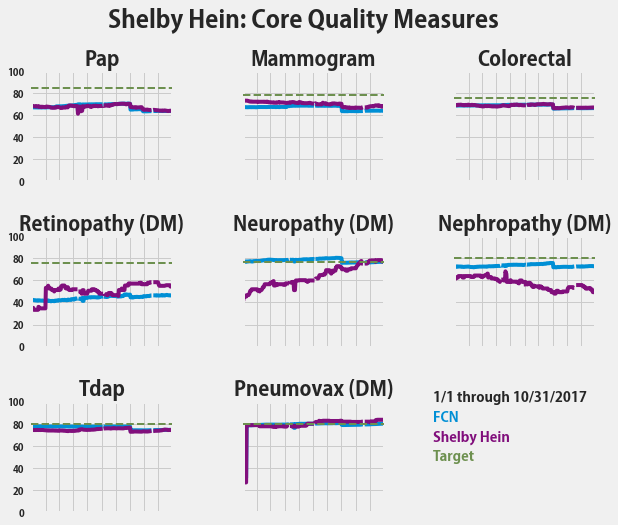

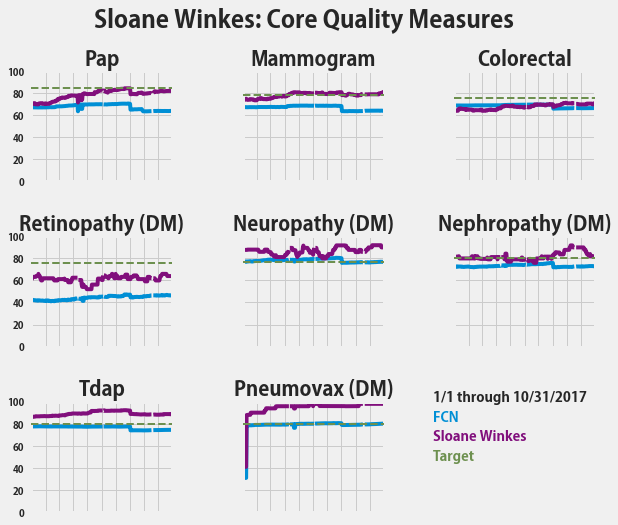

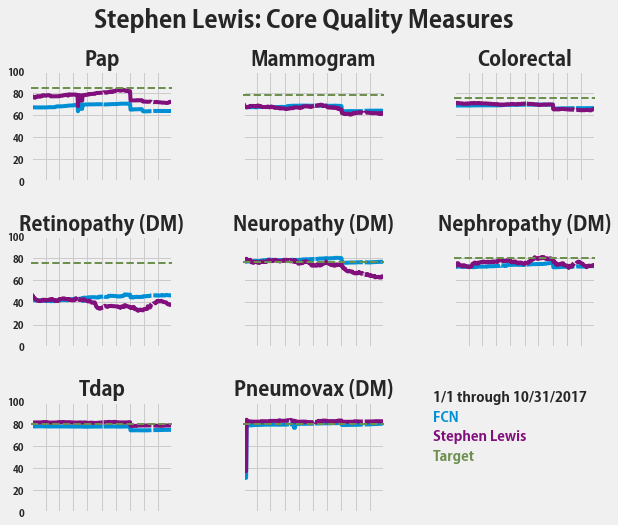

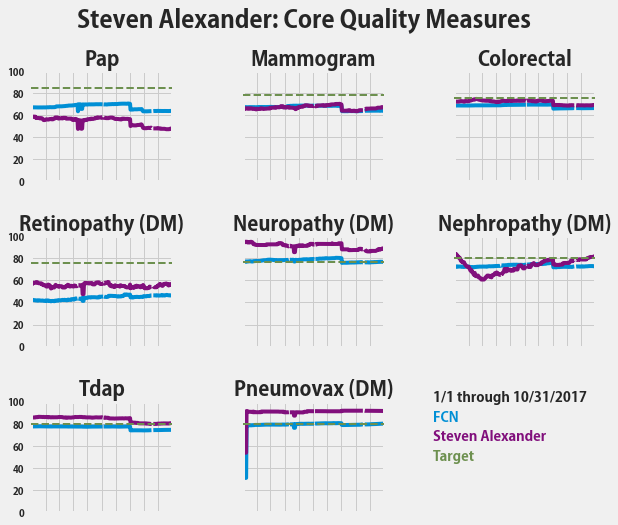

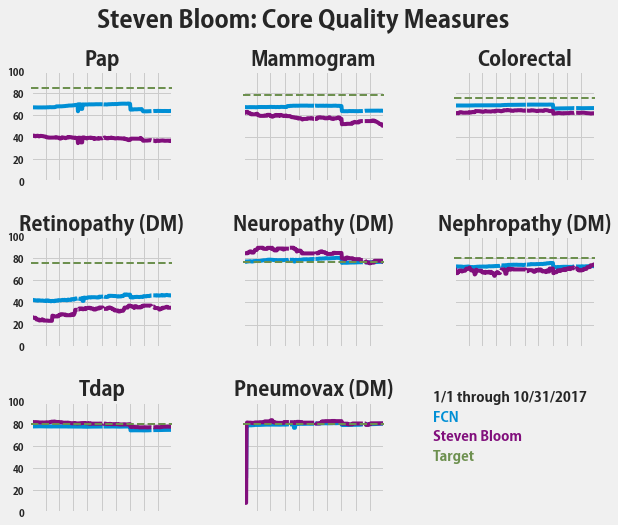

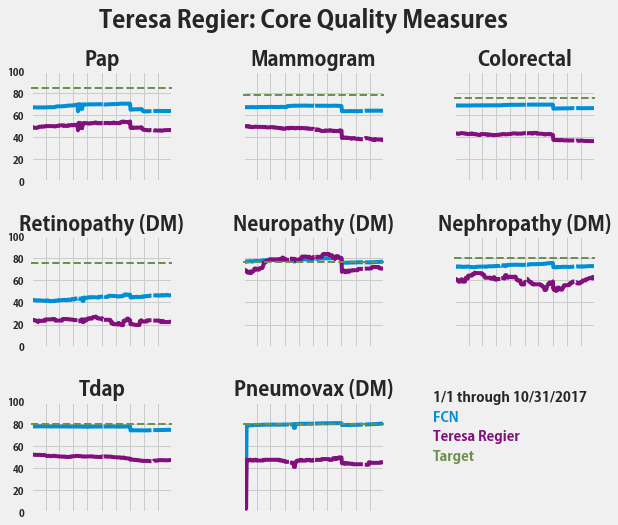

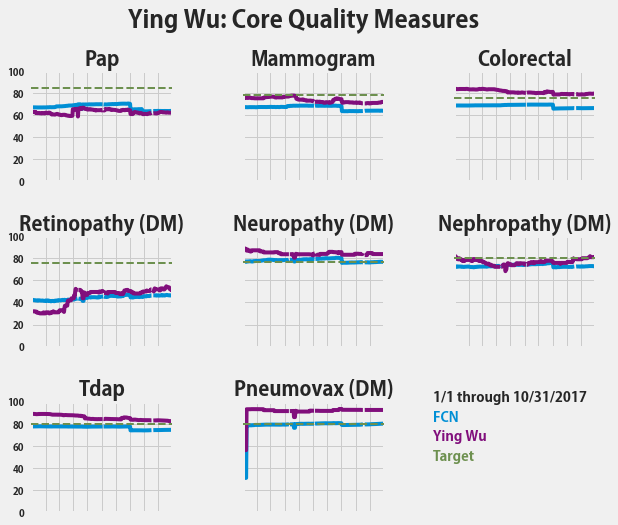

In [4]:
files = glob.glob('./provider/*.csv')

for file in files:
    individual = file.replace('./provider/',"")
    individual = individual[:-4]
    create_individual_core_quality_graphs(individual)

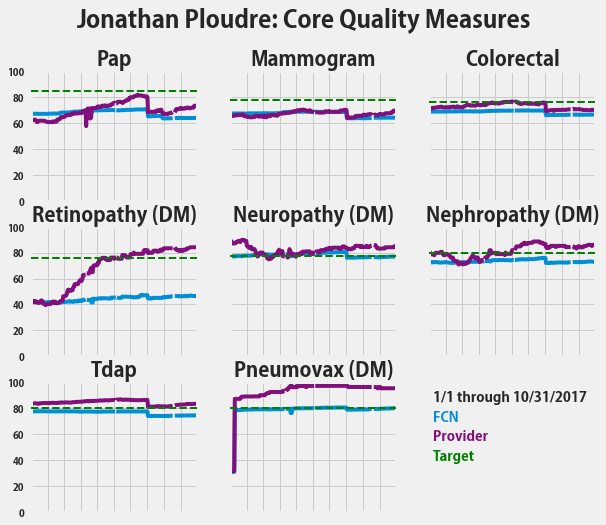

In [55]:
    dfs = []
    dfs.append(get_meridios_quality_history_csv('FCN',"FCN.csv"))
    #dfs.append(get_meridios_quality_history_csv(clinic, ('./clinic/' + clinic + '.csv')))
    dfs.append(get_meridios_quality_history_csv("Jonathan_Ploudre", ('./provider/' + "Jonathan_Ploudre" + '.csv')))   
    big_frame = pd.concat(dfs, ignore_index=True)
    big_frame = big_frame.pivot_table(index='lastupdate', columns=['metricname','Provider'], values="ptsseen_avg")
    
    # Summary Graph
    fig, ax = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9,9))
    fig.suptitle("Jonathan Ploudre" + ": Core Quality Measures", fontsize=24)
    
    basic_trendline(big_frame, ax[0][0], "PAP", "Pap", 85)
    basic_trendline(big_frame, ax[0][1], "MAMMO", "Mammogram", 78)
    basic_trendline(big_frame, ax[0][2], "COLORECTAL", "Colorectal", 76)
    
    basic_trendline(big_frame, ax[1][0], "DM-EYE", "Retinopathy (DM)", 76)
    basic_trendline(big_frame, ax[1][1], "DM-FOOT", "Neuropathy (DM)", 77)
    basic_trendline(big_frame, ax[1][2], "DM-KIDNEY", "Nephropathy (DM)", 80)

    basic_trendline(big_frame, ax[2][0], "TDAP", "Tdap", 80)
    basic_trendline(big_frame, ax[2][1], "DM-PPSV", "Pneumovax (DM)", 80)
    fig.delaxes(ax[2][2])
    #ax[2][1].legend(loc="lower right", bbox_to_anchor=(2.2,0.2))
    #ax[2][2].axis('off')
    
    # Colors '008fd5' blue, 'fc4f30' red, 'e5ae38' yellowish, '6d904f' green, '8b8b8b' gray, '810f7c' purple]
    for ax in fig.axes:
        ax.get_lines()[0].set_color("#008fd5")
        ax.get_lines()[1].set_color("#810f7c")
    
    plt.figtext(0.70,0.37,'1/1 through 10/31/2017',fontsize=14,ha='left')
    plt.figtext(0.70,0.34,'FCN',fontsize=14,ha='left',color="#008fd5")
    plt.figtext(0.70,0.31,'Provider',fontsize=14,ha='left',color="#810f7c")
    plt.figtext(0.70,0.28,'Target',fontsize=14,ha='left',color="green")
    plt.savefig("./output/" + "Jonathan Ploudre" + ".png")

In [52]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))